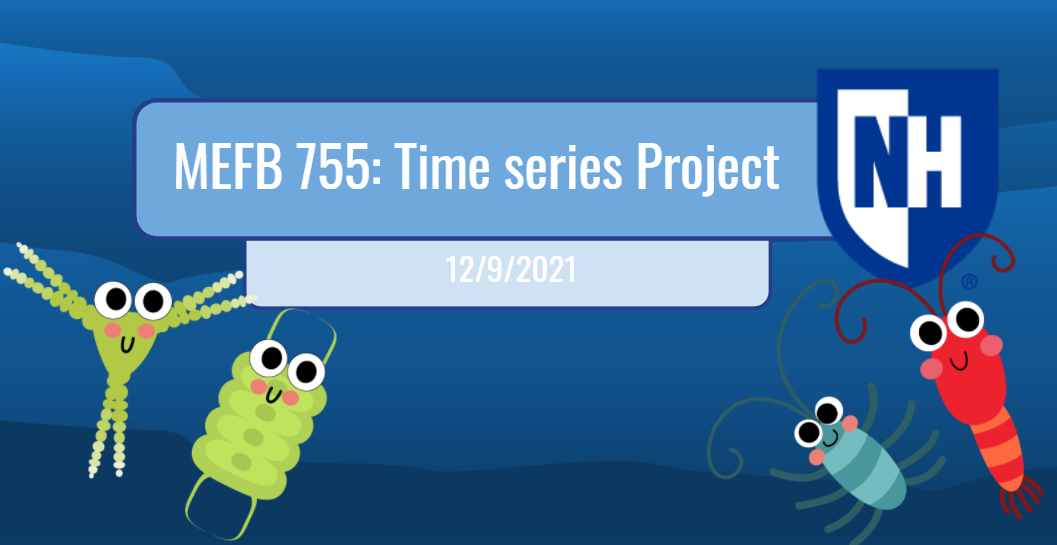

<p style="text-align:left;font-size:16px;font-family:Helvetica,sans-serif;font-style:italic">
Author: Devan Walton    
<span style="float:right;">
Date: 12/9/2021</span>
</p>

***

<h3 style="font-size:35px;font-family:Helvetica,sans-serif;font-weight:bold">
1.0 - Introduction</h3>

***

<h4 style="font-size:25px;font-family:Helvetica,sans-serif;font-weight:bold;color:#aaaaaa">
1.1-The Context</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
As research becomes more data-driven, it has become increasingly important for students and early-career researchers to learn data analysis skills. Unfortunately, these skills are frequently difficult to teach alongside core content. This difficulty leaves facilitators faced with the dilemma of either focusing on traditional disciplinary learning objectives or on objectives related to data science. The goal of this project is to investigate potential avenues for helping high-education facilitators easily integrate data science education into their curricula such that do not need to compromise on their traditional content objectives. This project will be particularly concerned with helping further integrate data science into biological oceanography courses.  </h4>

<h4 style="font-size:25px;font-family:Helvetica,sans-serif;font-weight:bold;color:#aaaaaa">
1.2-The Tools</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
The integration of data science will be explored through Python. Jupyter Notebook and Trinket will be the primary tools used within this investigation for implementing Python environments. These tools are both free and readily accessible to users over the web without needing to download software  </h4>

<h4 style="font-size:25px;font-family:Helvetica,sans-serif;font-weight:bold;color:#aaaaaa">
1.3-The Data</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
The Python tools will be used in conjuction with the physical conditions, zooplankton, and phytoplankton datasets associated with the oceanography department at the University of Rhode Island. These are biweekly datasets that evaluate the conditions within Naragansett Bay<sup>[5]</sup>.  </h4>

<h3 style="font-size:35px;font-family:Helvetica,sans-serif;font-weight:bold">
2.0 - Methods</h3>

***

<h4 style="font-size:25px;font-family:Helvetica,sans-serif;font-weight:bold;color:#aaaaaa">
2.1-The Trinket Environments</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
Trinket was used to develop a set of environments that could showcase how traditional biological oceanography could be learned alongside the fundamentals of Python. These environments were designed to be explored collaboratively by small groups of students within a classroom. These groups of students would run each Trinket module by clicking on the 'Play' button in the upper-left corner of the module's window. This button would execute the code and allow the groups to visualize how the code runs by watching the animation in the canvas frame on the right. The groups would use feedback from this animation to both guide the debugging of their code and their understanding of a particular biological oceanography concept. Below are the two designed examples of Trinket environments. These environments were focused on engaging students with both the fundamentals of using Python methods and with the basics mechanics of zooplankton grazing:  </h4>

In [27]:
from IPython.display import HTML
HTML('<iframe src=https://trinket.io/python/e7cf2d558b width=900 height=600></iframe>')


In [26]:
from IPython.display import HTML
HTML('<iframe src=https://trinket.io/python/fd408ec0ff width=900 height=600></iframe>')

<h4 style="font-size:25px;font-family:Helvetica,sans-serif;font-weight:bold;color:#aaaaaa">
2.2-The Jupyter Notebook Environment</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
Jupyter Notebook was used to develop an environment that would allow students to explore real-world datasets related to biological oceanography. Previously described Naragansett Bay datasets were used in conjuction with Jupyter Notebook to develop this type of environment. Groups of students would work collaboratively to debug or generate code that would accomplish particular tasks related to visualizing the Naragansett Bay data. These tasks would be related to processes like ingesting data, normalizing data, trimming data, cleaning data, building plots, formatting plots, and grouping plots. Students would be encouraged to leverage their biological oceanography content knowledge to perform these tasks in a way that aligns with the traditional etiquette of the field. Below is a sequence of code blocks that showcase how some of these tasks could be implemented on the Naragansett Bay dataset:  </h4>

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
2.2.1-Libraries and Initial Variables</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
The first showcases both how libraries can be imported and initial variables can be defined for a script: </h4>

In [29]:
!pip3 install numpy
!pip3 install pandas
!pip install matplotlib
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

fileNames = ['Physical_Data.csv', 'Phytoplankton_Data.csv', 'Zooplankton_Data.csv']

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
2.2.2-Data Ingestion and Cleaning</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
This code block demonstrates how data can be ingested from a CSV file into a dataframe. It additionally showcases some of the nuance associated with cleaning different types of input data. For example, the physical conditions dataset being imported into dfphys uses an idiosyncratic date format for its record. This means that a string format parameter is needed in order to help Python understand their date formatting. The zooplankton input data uses row headings rather than the traditional column heading, so this block also demonstrates how to transpose the ingested data. The zooplankton data also has multiple 'date' columns. As 'date' is traditionally used as an index value, this can cause issues when performing functions on the dataset. This code block also demonstrates how to tackle this problem of index duplication: </h4>

In [7]:
dfphys = pd.read_csv(fileNames[0], delimiter=",", comment='#', header=0, index_col=['Date'], encoding= 'unicode_escape')
dfphys.index = pd.to_datetime(dfphys.index, format='%d-%b-%y', errors='coerce') #Set the index as a DateTime object using the date formatting (1-Jan-99) that the researcher's used 
dfphys = dfphys.iloc[1:,:] #Drop the invalid data in the first row of all columns

dfphyto = pd.read_csv(fileNames[1], delimiter=",", comment='#', header=0, parse_dates=['DATE'], index_col=['DATE'])
dfphyto.index = pd.to_datetime(dfphyto.index, format='%d-%b-%y', errors='coerce') #Set the index as a DateTime object using the date formatting (1-Jan-99) that the researcher's used 
dfphyto = dfphyto.iloc[1:,:] #Drop the invalid data in the first row of all columns

dfzoo = pd.read_csv(fileNames[2], delimiter=",", comment='#', index_col=0, header=0).T
dfzoo = dfzoo.loc[:,~dfzoo.columns.duplicated()] #Remove the duplicated Date column
dfzoo['Date'] = pd.to_datetime(dfzoo['Date']) #Convert the remaining Date column into a DateTime object
dfzoo = dfzoo.set_index('Date') #Change the index to the Date column

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
2.2.3-Building a Plot and Additional Cleaning</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
This code block primarily demonstrates how data can be used across different dataframes to build a single plot. It also clues the audience into strategies for filling data with NAN values and dealing with record cells that mistakenly contain strings rather than numbers: </h4>

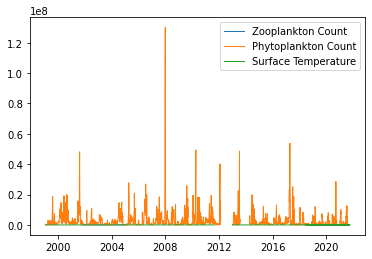

In [8]:
fig, ax = plt.subplots() #Build figure with a single subplot
dfzoo['TOTAL ZOOPLANKTON'] = dfzoo['TOTAL ZOOPLANKTON'].fillna(0).astype('float') #Ensure that all values are numbers rather than strings or NANs
ax.plot(dfzoo.index, dfzoo['TOTAL ZOOPLANKTON'] , color='C0', linewidth=1, label = 'Zooplankton Count')
dfphyto['Total abundance'] = dfphyto['Total abundance'].fillna(0).astype('float') #Ensure that all values are numbers rather than strings or NANs
ax.plot(dfphyto.index, dfphyto['Total abundance'], color='C1', linewidth=1, label = 'Phytoplankton Count')
dfphys['Surface Temp'] = dfphys['Surface Temp'].fillna(0).astype('float') #Ensure that all values are numbers rather than strings or NANs
ax.plot(dfphys.index, dfphys['Surface Temp'], color='C2', linewidth=1, label = 'Surface Temperature')
ax.legend(loc='best') #Set legend

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
2.2.4-Normalizing Data</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
The previous block successfully builds a plot; however, its associated data is not normalized so it is difficult to interpret any trends. The phytoplankton count values are several orders of magnitude larger than the zooplankton and surface temperature values, so they dominate the visual space of the chart. This next code block demonstrates a strategy for normalizing this data by z-score such that trends in zooplankton, phytoplankton, and surface temperature can be easily interpreted together:  </h4>

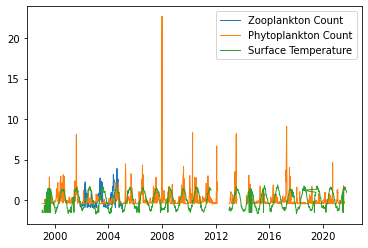

In [30]:
zooCountMean = dfzoo['TOTAL ZOOPLANKTON'].mean() #Calculate the mean of the zooplankton totals
zooCountDeviation = dfzoo['TOTAL ZOOPLANKTON'].std() #Calculate the standard deviation of the zooplankton totals
dfzoo['Zscore'] = (dfzoo['TOTAL ZOOPLANKTON'] - zooCountMean)/zooCountDeviation #Create a new column within dfzoo to hold the zscore for each count value

phytoCountMean = dfphyto['Total abundance'].mean() #Calculate the mean of the phytoplankton totals
phytoCountDeviation = dfphyto['Total abundance'].std() #Calculate the standard deviation of the phytoplankton totals
dfphyto['Zscore'] = (dfphyto['Total abundance'] - phytoCountMean)/phytoCountDeviation  #Create a new column within dfphyto to hold the zscore for each count value

tempMean = dfphys['Surface Temp'].mean() #Calculate the mean of the phytoplankton totals
tempDeviation = dfphys['Surface Temp'].std() #Calculate the standard deviation of the phytoplankton totals
dfphys['Zscore'] = (dfphys['Surface Temp'] - tempMean)/tempDeviation  #Create a new column within dfphys to hold the zscore for each temperature value

fig, ax = plt.subplots() #Build figure with a single subplot
ax.plot(dfzoo.index, dfzoo['Zscore'] , color='C0', linewidth=1, label = 'Zooplankton Count')
ax.plot(dfphyto.index, dfphyto['Zscore'], color='C1', linewidth=1, label = 'Phytoplankton Count')
ax.plot(dfphys.index, dfphys['Zscore'], color='C2', linewidth=1, label = 'Surface Temperature')
ax.legend(loc='best') #Set legend

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
2.2.5-Trimming Data</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
The previous block's normalization makes it slightly easier to recognize broad trends in the data; however, the data is being rendered on a timescale that makes it difficult to visualize annual trends. Additionally, the zooplankton data ends in 2005, so the chart is not displaying the shared period of record between the data inputs. This next code block demonstrates how each of the input dataframes can be trimmed to a shared period of record that allows annual trends to be more easily recognized:  </h4>

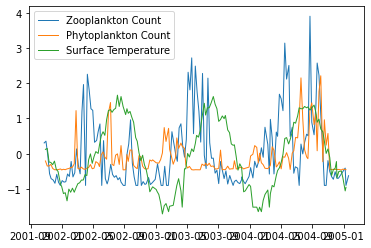

In [10]:
startDate = datetime.datetime(2001,10,24) #Set the starting date of our trim
endDate = datetime.datetime(2005,1,20) #Set the ending date of our trim

zooTrim = dfzoo[startDate:endDate] #Trim the zooplankton dataframe
phytoTrim = dfphyto[(dfphyto.index > startDate) & (dfphyto.index < endDate)] #Trim the phytoplankton dataframe
physTrim = dfphys[(dfphys.index > startDate) & (dfphys.index < endDate)] #Trim the physical observations dataframe

fig, ax = plt.subplots() #Build figure with a single subplot
ax.plot(zooTrim.index, zooTrim['Zscore'] , color='C0', linewidth=1, label = 'Zooplankton Count')
ax.plot(phytoTrim.index, phytoTrim['Zscore'], color='C1', linewidth=1, label = 'Phytoplankton Count')
ax.plot(physTrim.index, physTrim['Zscore'], color='C2', linewidth=1, label = 'Surface Temperature')
ax.legend(loc='best') #Set legend

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
2.2.6-Formatting Plot</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
The previous block's data trimming makes it easier to recognize annual trends, but there are still some issues with precisely interpreting the chart. For instance, the plot lacks a title, it lacks a y-axis label, the x-axis tick marks are all jumbled together, and the plot lines are difficult to differentiate from one another. This next code block demonstrates formatting strategies for alleviating all of these described issues with interpreting the plot's results:  </h4>

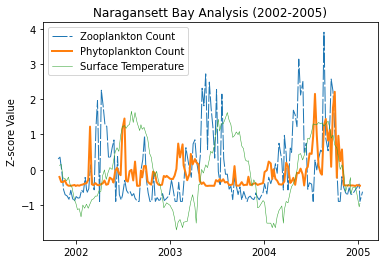

In [11]:
fig, ax = plt.subplots() #Build figure with a single subplot

#Add line dashes and change line weighting
ax.plot(zooTrim.index, zooTrim['Zscore'] , color='C0', dashes=[15, 2], linewidth=1, label = 'Zooplankton Count')
ax.plot(phytoTrim.index, phytoTrim['Zscore'], color='C1', linewidth=2, label = 'Phytoplankton Count')
ax.plot(physTrim.index, physTrim['Zscore'], color='C2', linewidth=0.5, label = 'Surface Temperature')

#Set title and label
ax.set_ylabel('Z-score Value')
ax.set_title('Naragansett Bay Analysis (2002-2005)')

#Set x-axis tick marks
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.legend(loc='best') #Set legend

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
2.2.7-Annotating Plot</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
The previous block's formmating changes make much easier to understand what is being depicted within the chart, but what if you needed to draw your audience's attention to a trend in a particular segment of the chart? This next code block demonstrates annotation strategies for building textboxes and arrows that can help cue the attention of your audience:  </h4>

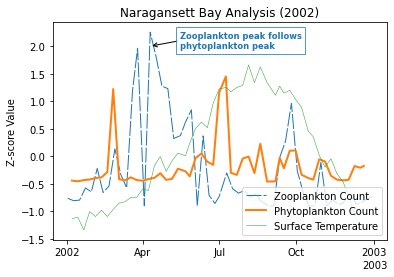

In [12]:
#Adjust plot to model a single year
startDate = datetime.datetime(2002,1,1) #Set the starting date of our trim
endDate = datetime.datetime(2003,1,1) #Set the ending date of our trim
zooTrim = dfzoo[(dfzoo.index > startDate) & (dfzoo.index < endDate)]  #Trim the zooplankton dataframe
phytoTrim = dfphyto[(dfphyto.index > startDate) & (dfphyto.index < endDate)] #Trim the phytoplankton dataframe
physTrim = dfphys[(dfphys.index > startDate) & (dfphys.index < endDate)] #Trim the physical observations dataframe

fig, ax = plt.subplots() #Build figure with a single subplot
ax.plot(zooTrim.index, zooTrim['Zscore'] , color='C0', dashes=[15, 2], linewidth=1, label = 'Zooplankton Count')
ax.plot(phytoTrim.index, phytoTrim['Zscore'], color='C1', linewidth=2, label = 'Phytoplankton Count')
ax.plot(physTrim.index, physTrim['Zscore'], color='C2', linewidth=0.5, label = 'Surface Temperature')
ax.set_ylabel('Z-score Value')
ax.set_title('Naragansett Bay Analysis (2002)')
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

#Create textbox
t1 = ax.text(datetime.datetime(2002,5,15),2.1, 'Zooplankton peak follows\nphytoplankton peak', color="C0", ha="left", va="center", zorder = 15,fontsize = 'small', weight = 'semibold')
t1.set_bbox(dict(facecolor='White', alpha=0.75, edgecolor='C0'))

#Create arrow
ax.annotate("", xy=(datetime.datetime(2002,4,10),2.0), xytext=(datetime.datetime(2002,5,15),2.1),arrowprops=dict(arrowstyle="->"))           
ax.legend(loc='lower right') #Set legend

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
2.2.8-Arranging Subplots</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
A single plot is not always appropriate for visualizing every type of data relationship. In some instances, it can be more effective to use a set of subplots that allow the audience to more easily compare intra- and inter-specific relationships. The below code block demonstrates how a group of subplots can be organized to compare male and female zooplankton counts across different species:  </h4>

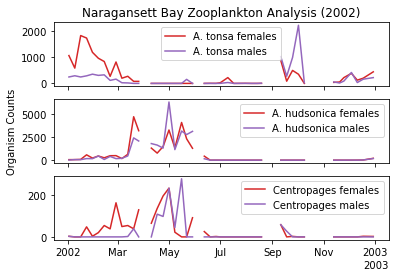

In [31]:
#Create a figure with 3 subplots
fig, ax = plt.subplots(3,1, sharex=True)

#Set data for each subplot
ax[0].plot(zooTrim.index, zooTrim['A. tonsa females'].astype('float'), color='C3', label = 'A. tonsa females')
ax[0].plot(zooTrim.index, zooTrim['A. tonsa males'].astype('float'), color='C4', label = 'A. tonsa males')
ax[0].legend(loc='best') #Set legend
ax[1].plot(zooTrim.index, zooTrim['A. hudsonica females'].astype('float'), color='C3', label = 'A. hudsonica females')
ax[1].plot(zooTrim.index, zooTrim['A. hudsonica males'].astype('float'), color='C4', label = 'A. hudsonica males')
ax[1].legend(loc='best') #Set legend
ax[2].plot(zooTrim.index, zooTrim['Centropages females'].astype('float'), color='C3', label = 'Centropages females')
ax[2].plot(zooTrim.index, zooTrim['Centropages males'].astype('float'), color='C4', label = 'Centropages males')
ax[2].legend(loc='best') #Set legend

ax[1].set_ylabel('Organism Counts')
ax[0].set_title('Naragansett Bay Zooplankton Analysis (2002)')
locator = mdates.AutoDateLocator(minticks=5, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)
ax[2].xaxis.set_major_locator(locator)
ax[2].xaxis.set_major_formatter(formatter)

<h3 style="font-size:35px;font-family:Helvetica,sans-serif;font-weight:bold">
3.0 - Results and Discussion</h3>

***

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
As no formal experiment was conducted, the results and discussion sections are being combined.</h4>

<h4 style="font-size:25px;font-family:Helvetica,sans-serif;font-weight:bold;color:#aaaaaa">
3.1-Key Lessons from Trinket</h4>

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
3.1.1-The Value of Visualizing</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
One important lesson learned from working with Trinket was the importance of capitalizing on its virtual canvas. Trinket allows its users to upload supporting PNG files to each project environment. These uploaded PNG files can be used as either a background image for the canvas or as skins for the elements that are moved around the screen by code. This feature empowers facilitators to help set the stage for learning to happen around a particular biological oceanography concept. Uploaded images can help cue learners into thinking about particular relationships from class that can aid them in solving the coding problem. They can also a provide a fun and informal backdrop that can ease anxiety many learners face when engaging with math<sup>[1]</sup>.   </h4>

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
3.1.2-Share is Caring!</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
Another great lesson learned from working with Trinket was its potential to support content sharing. As a facilitator, you can create a template environment that students can create branches from. Students can then save and share their modified branches with one another. This is similar to how Github and the widely popular Scratch coding environment work. This ability to share code is crucial in the context of learning, since it allows students to become personally invested in creating an artifact that they can have pride in. It allows the students to become motivated by mastery goals associated with making their code do something cool for others to enjoy. These sorts of intrinsic mastery goals that are encouraged by content sharing tend to lead to better learning outcomes than purely extrinsic motivations like grades<sup>[4]</sup>.    </h4>

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
3.1.3-Concrete Coding</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
The value of Trinket's ability to ground coding in concrete actions was another key lesson that was learned. Many introductory coding environments make the mistake of encouraging learners to work with datasets immediately. This can cause confusion for  learners that are not immediately comfortable with computation or abstract reasoning. For these learners, it can be helpful to work initially with an environment that allows them to leverage their spatial reasoning to perform computation. Trinket supports these learners by grounding Python methods within the movement of a character on the canvas. This feature gives learners the concrete scaffolds that they need in order to progress towards the more abstract challenges associated with dataset manipulation<sup>[3]</sup>.     </h4>

<h4 style="font-size:25px;font-family:Helvetica,sans-serif;font-weight:bold;color:#aaaaaa">
3.2-Key Lessons from Jupyter Notebook</h4>

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
3.2.1-Low Startup and Switching Costs</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
One important lesson learned from working with Jupyter Notebook was its potential to dramatically reduce the startup and transition costs associated with using a coding language in the classroom. Traditionally, it is a herculean effort to get students started in a Python or Matlab environment during class time. The IDEs frequently crash, students get confused with using directories, students download updates that create incompatabilities- the list goes! Jupyter Notebook eliminates all this extraneous cognitive overhead that can mire a classroom coding activity by being purely in the cloud. The code and datasets are integrated for them ahead of time so they do not even need to download the target data. Activities can begin just by clicking a URL<sup>[6]</sup>!       </h4>

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
3.2.2-Worked Examples</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
Another takeaway from working with Jupyter Notebook was the ease at which worked examples could be designed. Worked examples are a critical tool for helping students without much programming experience to dissect complicated functions. They additionally allow novices to immediately begin directed exploration and tinkering with code. The main drawback to worked examples in a coding context is that they are cumbersome to implement within a traditional IDE. Typically, discrete files are needed for each of the example sections of code, which can add a lot of extraneous cognitive overhead to the students. Jupyter Notebook allows for code to be executed in discrete 'code blocks', which makes it incredibly easy to implement sequential and cohesive worked examples for students<sup>[2]</sup>.      </h4>

<h4 style="font-size:21px;font-family:Helvetica,sans-serif;font-weight:Normal;color:#C7C6C6">
3.2.3-Modular Debugging</h4>

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
As a corrolary lesson to worked examples, the ease at which Jupyter Notebook can support can support debugging was also an important takeaway. The modular code blocks that make worked examples easy to implement also make it easy for students to debug code. If something crashes in a script, students have traditionally needed to review every line of code for a potentially error. The code blocks of Jupyter Notebook allow for crashes to be contained to a single block. For students that are still learning how to perform code tracing, this can dramatically reduce the amount of time they spend spinning their wheels trying to figure out where something went wrong. This allows the students to devout more time to understanding why something went wrong, which is more useful from a pedagogical standpoint.      </h4>

<h3 style="font-size:35px;font-family:Helvetica,sans-serif;font-weight:bold">
4.0 - Conclusions</h3>

***

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">
The results of this study suggest that there are viable pathways for implementing curricula that can achieve learning objectives associated with both traditional biological oceanography content and data science content. While meeting both sets of learning objectives can be difficult due to constraints around factors like content integration, content sequencing, cognitive overhead, and student motivation, this study has described insights for overcoming these factors using tools like Trinket and Jupyter Notebook. Both tools empower facilitators to design learning environments that allow students with minimal data science experience to engage with content in a way that allows them to leverage their biological oceanography knowledge and spatial reasoning to overcome computational challenges. These tools additionally streamline the generation of programming activities such that facilitators can spend more effort on sequencing the content and adding biological oceanographic media that can enrich the content. Finally, these tools allow coding content to be shared and accessed in a way that is readily amenable to classroom collaboration.
<br><br>
In the future, it would be interesting to investigate the precise types of classroom collaboration that would support working with Jupyter Notebook or Trinket. There are demonstrated advantages to collaboration techniques like pair programming, but techniques like these require a certain amount prior knowledge and expertise in order to be effective. One potential avenue of inquiry would be to investigate the types of scaffolding that could help students engage in the types of collaboration that exist between real-world biological oceanographers. Helping students engage in this type of collaboration might better prepare them for tackling internships or performing graduate research.  </h4>

<h3 style="font-size:35px;font-family:Helvetica,sans-serif;font-weight:bold">
5.0 - Works Cited</h3>

***

<h4 style="font-size:14px;font-family:Helvetica,sans-serif;font-weight:lighter;color:#876643;line-height: 180%;">


  [1] Bull, P. (2013). Cognitive Constructivist Theory of Multimedia: Designing Teacher-Made Interactive Digital. https://doi.org/10.4236/CE.2013.49088<br><br>
  [2] Chen, O., Kalyuga, S., & Sweller, J. (2015). The worked example effect, the generation effect, and element interactivity. Journal of Educational Psychology, 107(3), 689–704. https://doi.org/10.1037/edu0000018<br><br>
  [3] Francis, K., Khan, S., & Davis, B. (2016). Enactivism, Spatial Reasoning and Coding. https://doi.org/10.1007/S40751-015-0010-4<br><br>
  [4] Linnenbrink, E. A. (2004). The Dilemma of Performance-Approach Goals: The Use of Multiple Goal Contexts to Promote Students’ Motivation and Learning. https://doi.org/10.1037/0022-0663.97.2.197<br><br>
    [5] Reed, Laura and Candace Oviatt. 1976–2019. Marine Ecosystem Research Laboratory, Graduate School of Oceanography, URI, Narragansett, RI<br><br>
  [6] Sweller, J. (1988). Cognitive load during problem solving: Effects on learning. Cognitive Science, 12(2), 257–285. https://doi.org/10.1016/0364-0213(88)90023-7<br><br>


</h4>